# Pre

## 0-0 - install requirements

In [17]:
pip install pandas openpyxl matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 479.6 kB/s eta 0:00:000:00:010:00:01:01

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install -U scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 0-1 import Libs and modules

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import aux_factors

## 0-2 Load Data and show first five rows

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
df.head()


,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5


# Descriptions 

## 1 - fill nil values in salary col with ffill method


- we can use df['Salary'].bfill() or df['Salary'].mean() instead

In [4]:
df['Salary'].fillna(df['Salary'].ffill(), inplace=True)


In [5]:
df

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


## 2 - predict future salaries with Linear Regression

In [6]:
x = df[['Years']].values
y = df['Salary'].values

In [7]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [8]:
f_years = np.arange(1990, 2051).reshape(-1, 1)
f_salary = model.predict(f_years)

In [9]:
f_salary

array([ 33840.0802139 ,  36479.14338235,  39118.2065508 ,  41757.26971925,
        44396.3328877 ,  47035.39605615,  49674.4592246 ,  52313.52239305,
        54952.5855615 ,  57591.64872995,  60230.7118984 ,  62869.77506685,
        65508.83823529,  68147.90140374,  70786.96457219,  73426.02774064,
        76065.09090909,  78704.15407754,  81343.21724599,  83982.28041444,
        86621.34358289,  89260.40675134,  91899.46991979,  94538.53308824,
        97177.59625668,  99816.65942513, 102455.72259358, 105094.78576203,
       107733.84893048, 110372.91209893, 113011.97526738, 115651.03843583,
       118290.10160428, 120929.16477273, 123568.22794118, 126207.29110963,
       128846.35427807, 131485.41744652, 134124.48061497, 136763.54378342,
       139402.60695187, 142041.67012032, 144680.73328877, 147319.79645722,
       149958.85962567, 152597.92279412, 155236.98596257, 157876.04913102,
       160515.11229946, 163154.17546791, 165793.23863636, 168432.30180481,
       171071.36497326, 1

## 3 - Graph of saleries and predicted salery line based on X = Years and y = Saleries

### 
3-0 - Graph

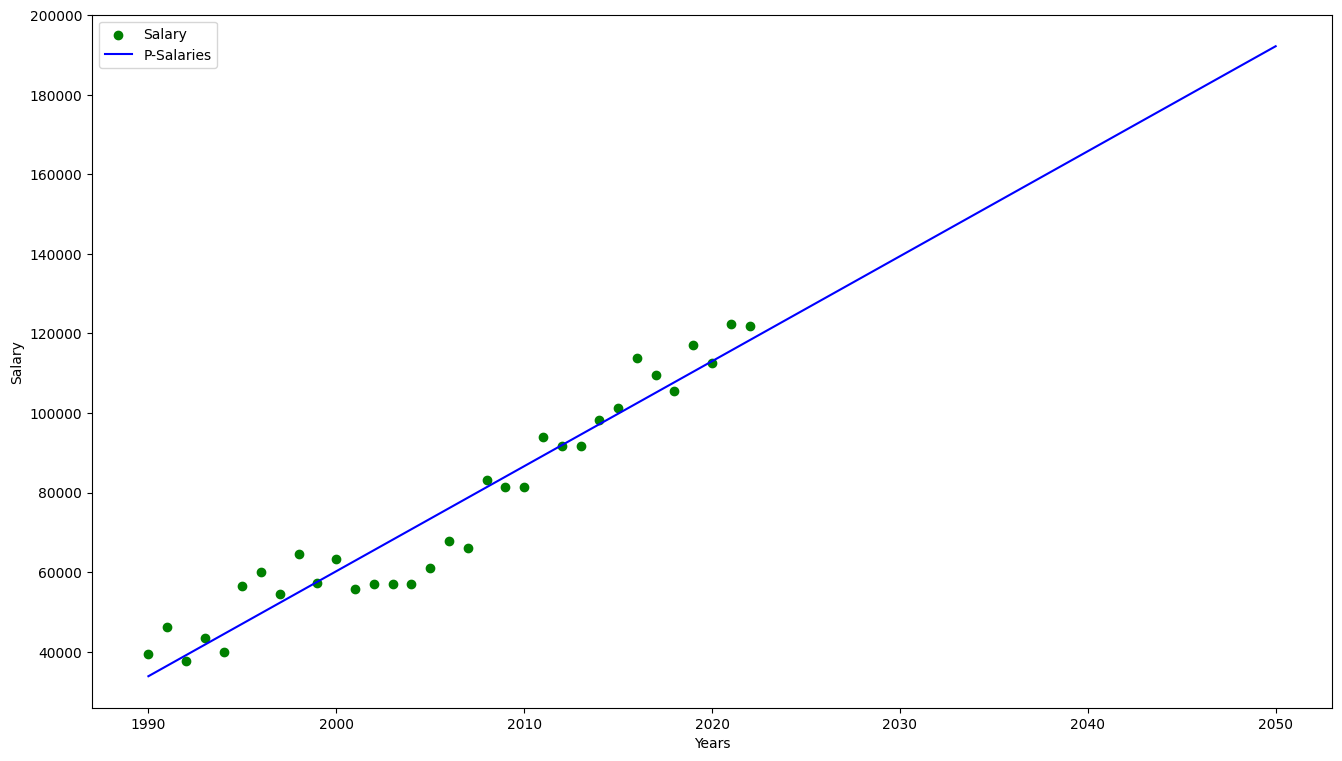

In [10]:
plt.figure(figsize=(16, 9))
plt.scatter(df['Years'], df['Salary'], color='green', label='Salary')
plt.plot(f_years, f_salary, color='blue', label='P-Salaries')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.legend()
plt.show()


### 3-1 - Coefficient of determination

In [11]:
r2_score = model.score(x, y)
r2_score
# 0.9288722371152188

0.9288722371152188

## 4 - Material 1 price prediction

In [12]:
i_f = 0.01 + 0.05
start_year = 1990

material1_p = df['material 1'].tolist()
df['adjs material 1'] = df.apply(lambda row: aux_factors.pf(row['material 1'], aux_factors.single_payment_compund_amount_factor(i_f, row['Years'], start_year)) , axis=1)
df.head()

,Years,Salary,material 1,material 2,demand,price,adjs material 1
0,1990,39343.0,200.000000,89.600000,103,1200.0,200.000000
1,1991,46205.0,212.000000,92.662500,104,1375.0,224.720000
2,1992,37731.0,224.720000,95.807250,101,1451.0,252.495392
3,1993,43525.0,238.203200,99.034819,99,1593.0,283.703822
4,1994,39891.0,252.495392,102.345626,95,1718.5,318.769615


In [15]:
X_m1 = df[['Years']].values
y_m1 = df['adjs material 1'].values

model_m1 = LinearRegression()
model_m1.fit(X_m1, y_m1)

LinearRegression()

In [16]:
m1_future = model_m1.predict(f_years)

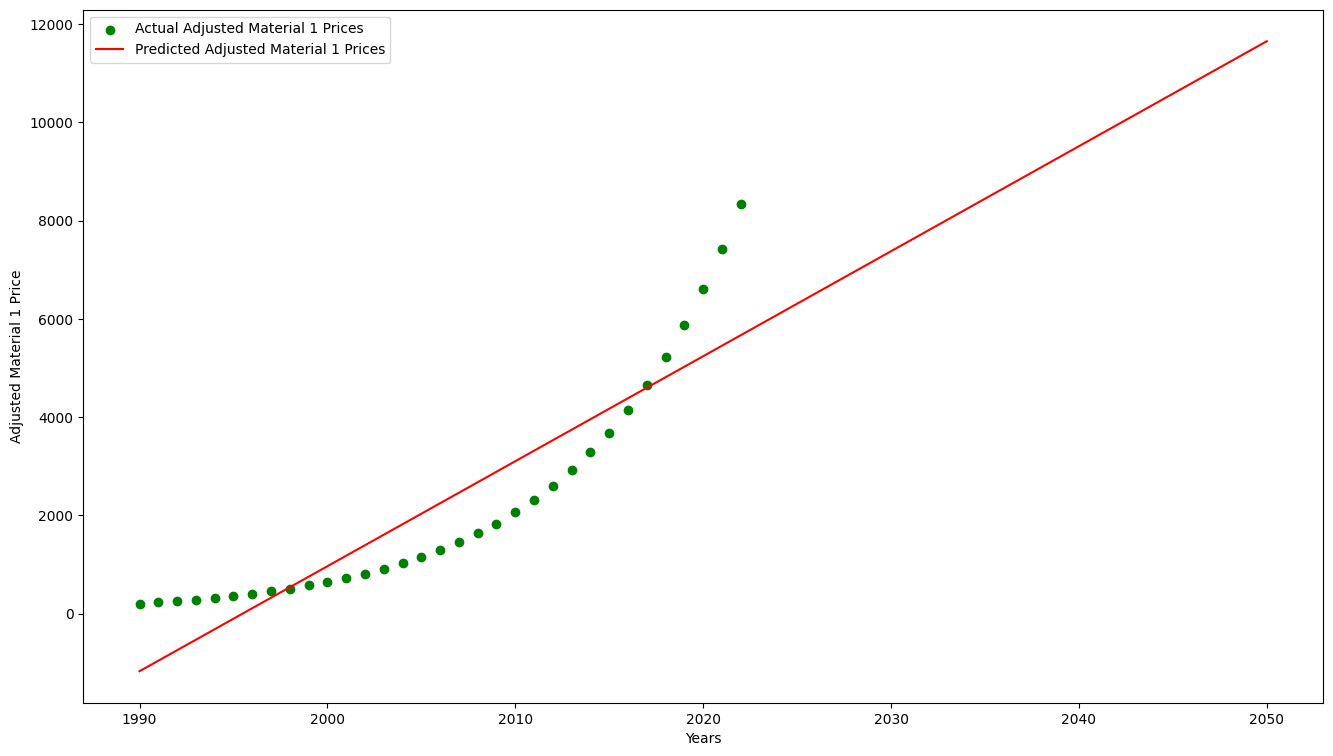

In [17]:
plt.figure(figsize=(16, 9))
plt.scatter(df['Years'], df['adjs material 1'], color='green', label='Actual Adjusted Material 1 Prices')
plt.plot(f_years, m1_future, color='red', label='Predicted Adjusted Material 1 Prices')
plt.xlabel('Years')
plt.ylabel('Adjusted Material 1 Price')
plt.legend()
plt.show()

In [18]:
### 4-1 Graph

## 5 - Material 2 Price Prediction

In [19]:
start_year = 1990

df['adjs material 2'] = df.apply(lambda row: aux_factors.pf(row['material 2'], aux_factors.single_payment_compund_amount_factor(0.05, row['Years'], start_year)) , axis=1)

In [20]:
X_m2 = df[['Years']].values
y_m2 = df['adjs material 2'].values


In [21]:
model_m2 = LinearRegression()
model_m2.fit(X_m2, y_m2)

LinearRegression()

In [22]:
m2_future = model_m2.predict(f_years)

## 6 - Graph of adjusted material 2 values

### 6-0 - Graph

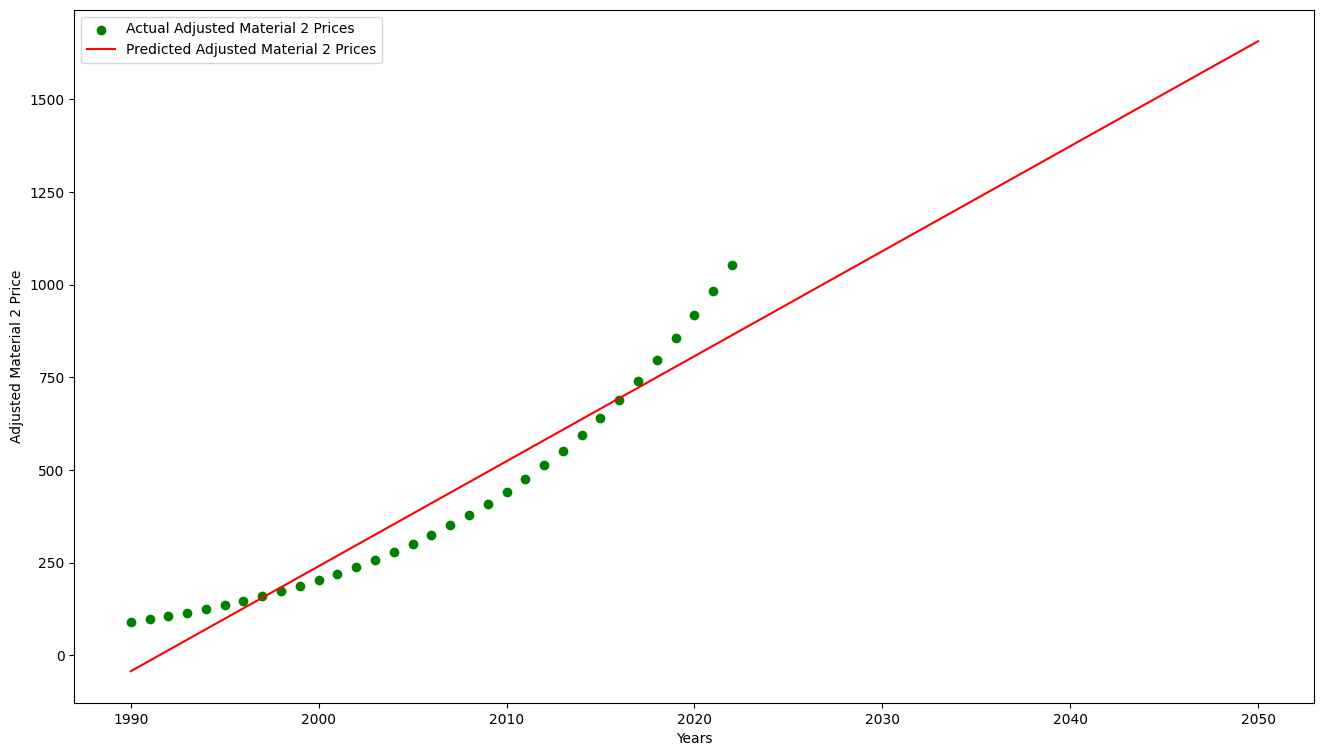

In [23]:
plt.figure(figsize=(16, 9))
plt.scatter(df['Years'], df['adjs material 2'], color='green', label='Actual Adjusted Material 2 Prices')
plt.plot(f_years, m2_future, color='red', label='Predicted Adjusted Material 2 Prices')
plt.xlabel('Years')
plt.ylabel('Adjusted Material 2 Price')
plt.legend()
plt.show()

In [24]:
df.head()

,Years,Salary,material 1,material 2,demand,price,adjs material 1,adjs material 2
0,1990,39343.0,200.000000,89.600000,103,1200.0,200.000000,89.600000
1,1991,46205.0,212.000000,92.662500,104,1375.0,224.720000,97.295625
2,1992,37731.0,224.720000,95.807250,101,1451.0,252.495392,105.627493
3,1993,43525.0,238.203200,99.034819,99,1593.0,283.703822,114.645182
4,1994,39891.0,252.495392,102.345626,95,1718.5,318.769615,124.401748


### 6-1 - Coefficient of determination

In [25]:
r2_score_material2 = model_m2.score(X_m2, y_m2)
r2_score_material2

0.9209681883962779

## 7 - Add demand function col

In [26]:
base_year = 1990
future_years = np.arange(base_year, 2050+1)
future_demand = np.exp(-(future_years  - base_year)/50)

In [27]:
future_df = pd.DataFrame({
    'Years': future_years,
    'Demand Function': future_demand
})

In [28]:
future_df.head()

,Years,Demand Function
0,1990,1.000000
1,1991,0.980199
2,1992,0.960789
3,1993,0.941765
4,1994,0.923116


In [29]:
df.head()


,Years,Salary,material 1,material 2,demand,price,adjs material 1,adjs material 2
0,1990,39343.0,200.000000,89.600000,103,1200.0,200.000000,89.600000
1,1991,46205.0,212.000000,92.662500,104,1375.0,224.720000,97.295625
2,1992,37731.0,224.720000,95.807250,101,1451.0,252.495392,105.627493
3,1993,43525.0,238.203200,99.034819,99,1593.0,283.703822,114.645182
4,1994,39891.0,252.495392,102.345626,95,1718.5,318.769615,124.401748


## 8 - future demand prediction

In [30]:
df['Demand Factor'] = np.exp(-(df['Years'] - base_year)/50)

In [31]:
X_demand = df[['Demand Factor']].values
y_demand = df['demand'].values

In [32]:
model_demand = LinearRegression()
model_demand.fit(X_demand, y_demand)

LinearRegression()

In [33]:
future_demand_factors = np.exp(-(future_years - base_year)/50)

In [34]:
predicted_demand = model_demand.predict(future_demand_factors.reshape(-1, 1))


## 9 - Actual and future demand graph

### 9-0 Graph

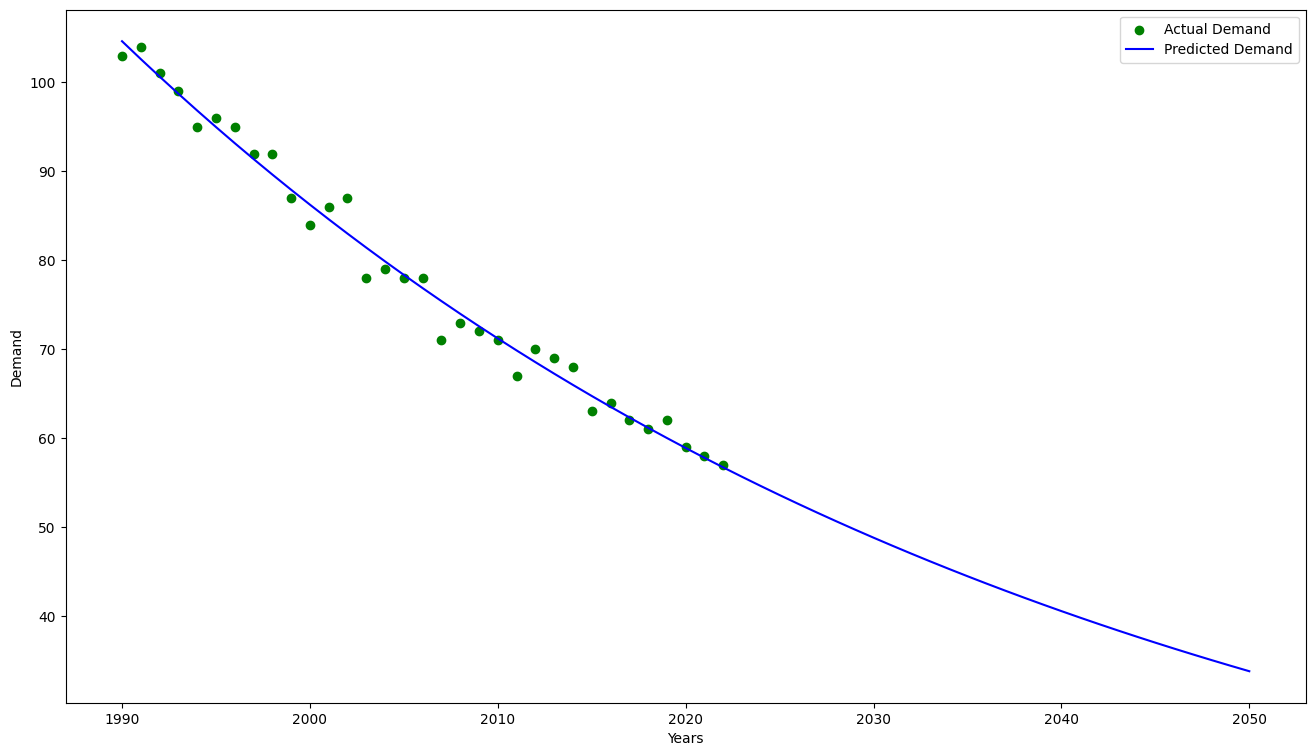

In [35]:
plt.figure(figsize=(16, 9))
plt.scatter(df['Years'], df['demand'], color='green', label='Actual Demand')
plt.plot(future_years, predicted_demand, color='blue', label='Predicted Demand')
plt.xlabel('Years')
plt.ylabel('Demand')
plt.legend()
plt.show()

### 9-1 - Coefficient of determination

In [36]:
r2_score_demand = model_demand.score(X_demand, y_demand)
r2_score_demand

0.9849573838479752

## 10 - Future price prediction

In [37]:
X_price = df[['Years']].values
y_price = df['price'].values

model_price = LinearRegression()
model_price.fit(X_price, y_price)

predicted_price = model_price.predict(f_years)


## 11 - Future price graph

### 11-0 - Graph

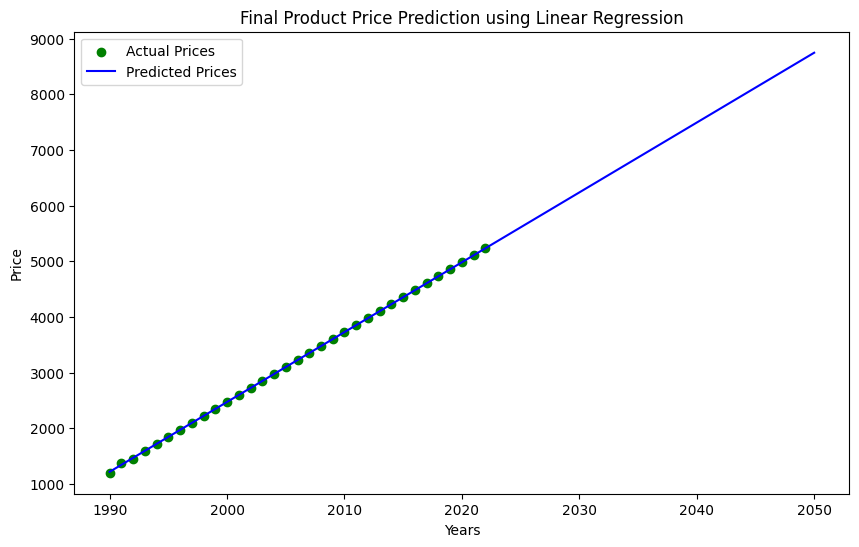

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Years'], df['price'], color='green', label='Actual Prices')
plt.plot(f_years, predicted_price, color='blue', label='Predicted Prices')
plt.xlabel('Years')
plt.ylabel('Price')
plt.title('Final Product Price Prediction using Linear Regression')
plt.legend()
plt.show()

### 11-1 - Coefficient of determination

In [39]:
r2_score_price = model_price.score(X_price, y_price)
r2_score_price

0.9999653378861689

# reqs

## req-1

In [40]:
df.head()

,Years,Salary,material 1,material 2,demand,price,adjs material 1,adjs material 2,Demand Factor
0,1990,39343.0,200.000000,89.600000,103,1200.0,200.000000,89.600000,1.000000
1,1991,46205.0,212.000000,92.662500,104,1375.0,224.720000,97.295625,0.980199
2,1992,37731.0,224.720000,95.807250,101,1451.0,252.495392,105.627493,0.960789
3,1993,43525.0,238.203200,99.034819,99,1593.0,283.703822,114.645182,0.941765
4,1994,39891.0,252.495392,102.345626,95,1718.5,318.769615,124.401748,0.923116


In [41]:
# adjust price material 2 => based on Demand
df['discounted material 2 price'] = df.apply(lambda row: aux_factors.discounted_price(row['demand'], row['material 2']), axis=1)

In [42]:
# total cost for material 2 => bases on Demand
df['t material 2 cost'] = df['discounted material 2 price'] * df['demand']


In [43]:
# calc total revenue
df['t revenue'] = df['price'] * df['demand']

In [44]:
# total cost
df['t cost'] = df['t material 2 cost'] + df['material 1']

In [45]:
# profit
df['profit'] = df['t revenue'] - df['t cost']

In [46]:
# predict profit to 2050
future_costs = []
future_revenues = []

f_years = np.array(range(2024, 2051)).reshape(-1, 1)
predicted_demand = model_demand.predict(f_years)
future_material_2_prices = model_m2.predict(f_years)

for i, year in enumerate(f_years.flatten()):
    demand = predicted_demand[i]
    material_2_price = aux_factors.discounted_price(demand, future_material_2_prices[i])
    total_material_2_cost = material_2_price * demand
    total_revenue = model_price.predict(np.array([[year]]))[0] * demand
    total_cost = total_material_2_cost + model_m1.predict(np.array([[year]]))[0]
    future_costs.append(total_cost)
    future_revenues.append(total_revenue)

future_profits = np.array(future_revenues) - np.array(future_costs)

In [47]:
# calc last profitable year
profitable_years = [year for year, profit in zip(future_years.flatten(), future_profits) if profit > 0]

if profitable_years:
    last_profitable_year = profitable_years[-1]
else:
    last_profitable_year = None

In [48]:
last_profitable_year

2016

## req-2

In [49]:
df.head()

,Years,Salary,material 1,material 2,demand,price,adjs material 1,adjs material 2,Demand Factor,discounted material 2 price,t material 2 cost,t revenue,t cost,profit
0,1990,39343.0,200.000000,89.600000,103,1200.0,200.000000,89.600000,1.000000,73.472000,7567.616000,123600.0,7767.616000,115832.384000
1,1991,46205.0,212.000000,92.662500,104,1375.0,224.720000,97.295625,0.980199,75.983250,7902.258000,143000.0,8114.258000,134885.742000
2,1992,37731.0,224.720000,95.807250,101,1451.0,252.495392,105.627493,0.960789,78.561945,7934.756445,146551.0,8159.476445,138391.523555
3,1993,43525.0,238.203200,99.034819,99,1593.0,283.703822,114.645182,0.941765,81.208551,8039.646586,157707.0,8277.849786,149429.150214
4,1994,39891.0,252.495392,102.345626,95,1718.5,318.769615,124.401748,0.923116,83.923414,7972.724285,163257.5,8225.219677,155032.280323


In [50]:
f_years = np.array(range(2022, 2033)).reshape(-1, 1)


In [51]:
X_demand = df[['Years']].values
y_demand = df['demand'].values

demand_model = LinearRegression()
demand_model.fit(X_demand, y_demand)

predicted_demand = demand_model.predict(f_years)

In [52]:
X_material_2 = df[['Years']].values
y_material_2 = df['adjs material 2'].values

model_m2 = LinearRegression()
model_m2.fit(X_material_2, y_material_2)

predicted_m2 = model_m2.predict(f_years)

In [53]:
X_price = df[['Years']].values
y_price = df['price'].values

model_price = LinearRegression()
model_price.fit(X_price, y_price)

predicted_price = model_price.predict(f_years)

In [65]:
future_costs = []
future_revenues = []
future_profits = []

for i, year in enumerate(f_years.flatten()):
    demand = predicted_demand[i]
    material_2_price = aux_factors.discounted_price(demand, predicted_m2[i])
    total_material_2_cost = material_2_price * demand
    total_revenue = predicted_price[i] * demand
    total_cost = total_material_2_cost + model_m1.predict(np.array([[year]]))[0]
    profit = total_revenue - total_cost
    future_costs.append(total_cost)
    future_revenues.append(total_revenue)
    future_profits.append(profit)

    


In [66]:
stakeholder_share = np.array(future_profits) * 0.25
annual_savings = stakeholder_share * 0.20


In [67]:
annual_savings.mean()

11225.291582933918

## req - 3

In [95]:
# consts
discount_rate = 0.05
base_year = 1990
required_profit = 250000
from_y = 2022
to_y = 2032

In [96]:
future_years = np.array(range(from_y, to_y + 1)).reshape(-1, 1)
predicted_demand = model_demand.predict(future_years)
predicted_material_2_prices = model_m2.predict(future_years)
predicted_prices = model_price.predict(future_years)

In [109]:
future_costs = []
future_revenues = []
future_profits = []

for i, year in enumerate(future_years.flatten()):
    demand = predicted_demand[i]
    material_2_price =aux_factors.discounted_price(demand, predicted_material_2_prices[i])
    total_material_2_cost = material_2_price * demand
    total_revenue = predicted_prices[i] * demand
    total_cost = total_material_2_cost + model_m1.predict(np.array([[year]]))[0]
    profit = total_revenue - total_cost
    future_costs.append(total_cost)
    future_revenues.append(total_revenue)
    future_profits.append(profit)




In [110]:
future_costs

[145136104.33704892,
 149973785.43064836,
 154816177.95963448,
 159663281.92400724,
 164515097.3237667,
 169371624.15891284,
 174232862.42944565,
 179098812.1353652,
 183969473.2766714,
 188844845.8533643,
 193724929.8654426]

In [111]:
future_revenues

[1072428814.9571687,
 1098693802.6734505,
 1124984232.0169635,
 1151300102.9877076,
 1177641415.5856833,
 1204008169.8108904,
 1230400365.6633291,
 1256818003.142999,
 1283261082.2499003,
 1309729602.984033,
 1336223565.345397]

In [112]:
future_profits

[927292710.6201198,
 948720017.2428021,
 970168054.0573289,
 991636821.0637004,
 1013126318.2619166,
 1034636545.6519775,
 1056167503.2338835,
 1077719191.0076337,
 1099291608.973229,
 1120884757.1306689,
 1142498635.4799545]

In [116]:
discounted_profits = [profit / (aux_factors.single_payment_compund_amount_factor(discount_rate ,year,base_year)) for year, profit in zip(range(from_y, to_y + 1), future_profits)]
discounted_profits

[194607366.47660592,
 189623079.21682844,
 184676145.5280079,
 179774122.25676057,
 174923770.79610342,
 170131115.2811352,
 165401497.06631204,
 160739625.70552173,
 156149626.64357233,
 151635085.81581607,
 147199091.3413935]

In [117]:
total_discounted_profit = sum(discounted_profits)
total_discounted_profit

1874860526.1280572

In [118]:
company_price = required_profit / total_discounted_profit * total_discounted_profit
company_price

250000.0